# Análisis Exploratorio de Datos

En este notebook exploraremos el dataset **Adult Income**, que contiene información demográfica y laboral de más de 48.000 personas.  
El objetivo es entender las variables y su relación con los ingresos antes de aplicar modelos de clasificación como Árboles de Decisión y Random Forest.

In [15]:
# --- Imports ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
# --- Cargar dataset ---
df = pd.read_csv('../data/raw/adult.csv')

# Revisar info general
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1. Resumen de las columnas

El dataset cuenta con 48.842 registros y 15 columnas, de las cuales 6 son numéricas y 9 categóricas.  

In [17]:
df.info()
df.describe(include='all')
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## 2. Limpieza de datos

Al revisar los datos, se detectó que algunos valores desconocidos están representados con `'?'`.  
Para tratarlos correctamente, los reemplazamos por valores nulos:

In [18]:
# Reemplazar '?' por NaN
df.replace('?', np.nan, inplace=True)

## 3. Edad (`age`)

La columna `age` indica la edad de cada individuo.  
La edad mínima es 17 años y la máxima 90 años.  
Este rango permite analizar la relación entre experiencia laboral y nivel de ingresos.

Edad mínima: 17
Edad máxima: 90
[np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), n

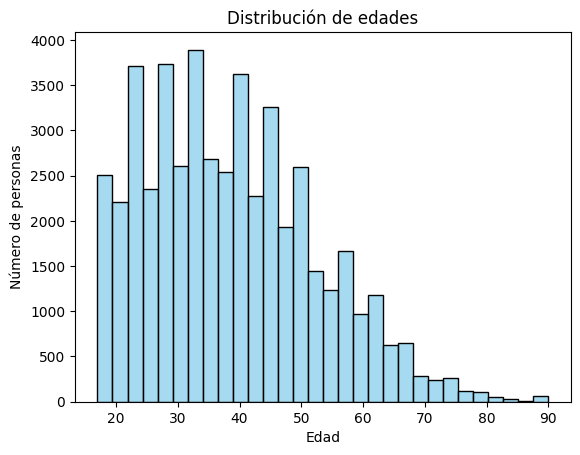

In [19]:
edad_min = df['age'].min()
edad_max = df['age'].max()

print(f"Edad mínima: {edad_min}")
print(f"Edad máxima: {edad_max}")

# Opcional: todos los valores únicos ordenados
valores_unicos = sorted(df['age'].unique())
print(valores_unicos)

# --- Distribución de edades ---
sns.histplot(df['age'], bins=30, kde=False, color='skyblue')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.show()


## 4. Tipo de empleo (`workclass`)

`workclass` indica el tipo de relación laboral. Las categorías incluyen:

- Private
- Local-gov
- Self-emp-not-inc
- Federal-gov
- State-gov
- Self-emp-inc
- Without-pay
- Never-worked

La mayoría de las personas pertenece a **Private**, mientras que las demás categorías tienen frecuencias similares y bajas.


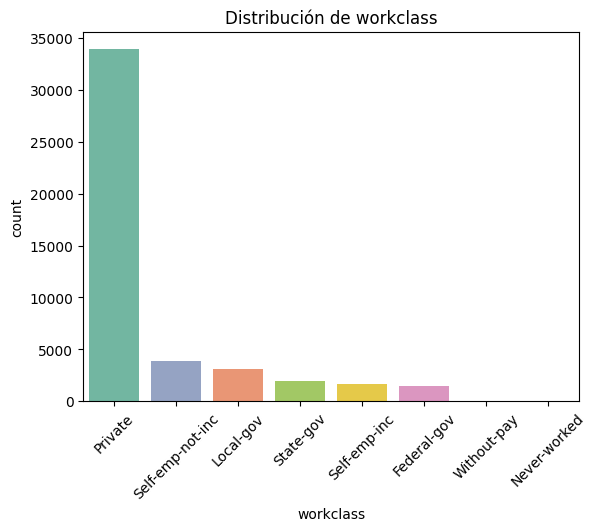

In [20]:
# --- Distribución workclass ---
sns.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index, palette='Set2',hue='workclass', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución de workclass')
plt.show()


## 5. Ponderación de la muestra (`fnlwgt`)

`fnlwgt` indica cuántas personas en la población real representan las características de ese registro.  
No se utiliza como variable predictiva en el modelo de ingresos, pero es útil para análisis estadísticos que busquen representar la población total.


## 6. Nivel educativo (`education`)

`education` indica el nivel educativo más alto alcanzado.  
Los valores más frecuentes son:

- HS-grad (secundaria completa)
- Some-college (algo de universidad)

Niveles superiores como Bachelors, Masters o Doctorate son menos comunes.


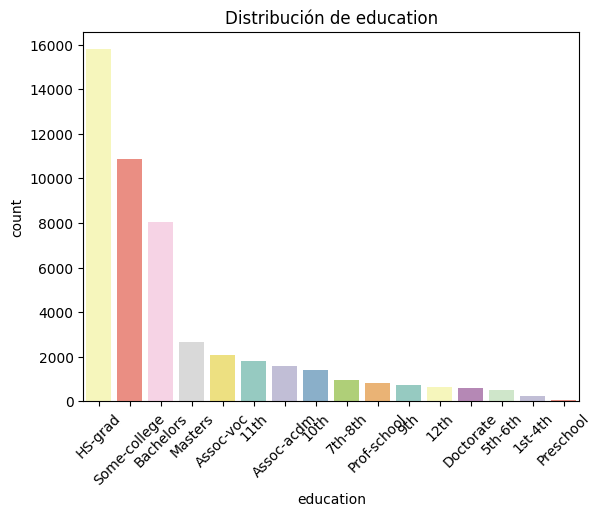

In [21]:
# --- Distribución education ---
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='Set3',hue='education', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución de education')
plt.show()


## 7. Nivel educativo numérico (`educational-num`)

`educational-num` traduce la educación a formato numérico para que los modelos de ML puedan usarlo directamente.  
Valores bajos = educación básica, valores altos = estudios universitarios o de posgrado.


## 8. Estado civil (`marital-status`)

`marital-status` indica si la persona está:

- Never-married
- Married-civ-spouse
- Widowed
- Divorced
- Separated
- Married-spouse-absent
- Married-AF-spouse

Las categorías más frecuentes son **Married-civ-spouse** y **Never-married**; la menos frecuente es **Married-AF-spouse**.


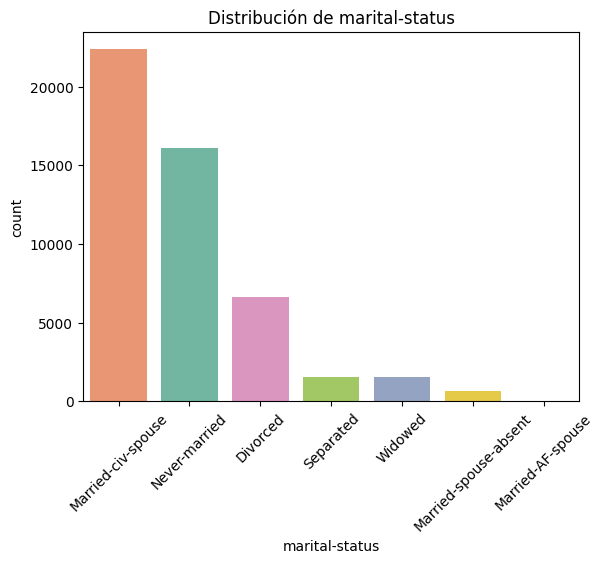

In [22]:
# --- Distribución marital-status ---
sns.countplot(data=df, x='marital-status', order=df['marital-status'].value_counts().index, palette='Set2',hue='marital-status', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución de marital-status')
plt.show()


## 9. Ocupación (`occupation`)

`occupation` indica la ocupación principal del individuo.  
Las más frecuentes:

- Prof-specialty
- Craft-repair
- Exec-managerial

La menos frecuente es **Armed-Forces**.


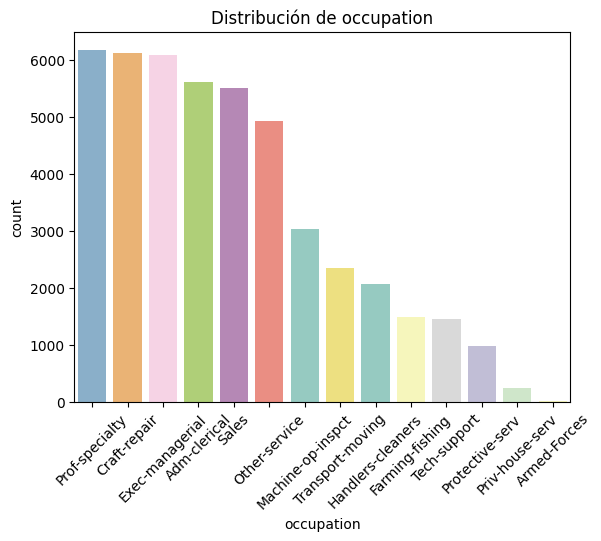

In [23]:
# --- Distribución occupation ---
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index, palette='Set3',hue='occupation', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución de occupation')
plt.show()


## 10. Relación familiar (`relationship`)

`relationship` indica la relación con otros miembros del hogar.  
Las categorías más frecuentes son **Husband** y **Not-in-family**, mientras que **Other-relative** y **Wife** tienen menor presencia.


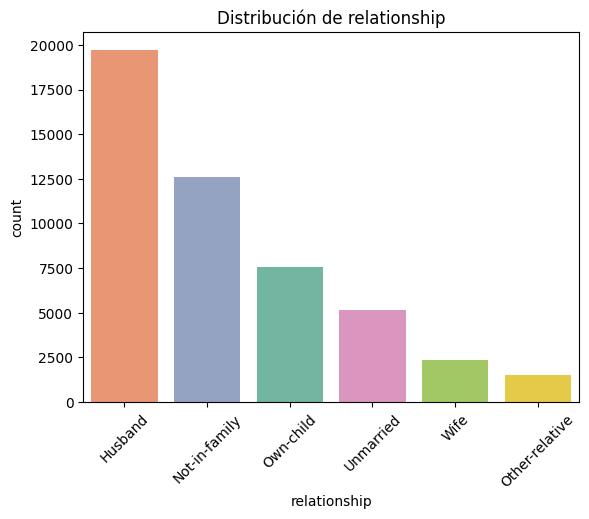

In [24]:
# --- Distribución relationship ---
sns.countplot(data=df, x='relationship', order=df['relationship'].value_counts().index, palette='Set2',hue='relationship', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución de relationship')
plt.show()


## 11. Raza (`race`)

`race` indica la etnia del individuo.  
Predominan las personas identificadas como **White**, seguidas de **Black**.  
Otras categorías como Asian-Pac-Islander, Amer-Indian-Eskimo y Other tienen frecuencias bajas.


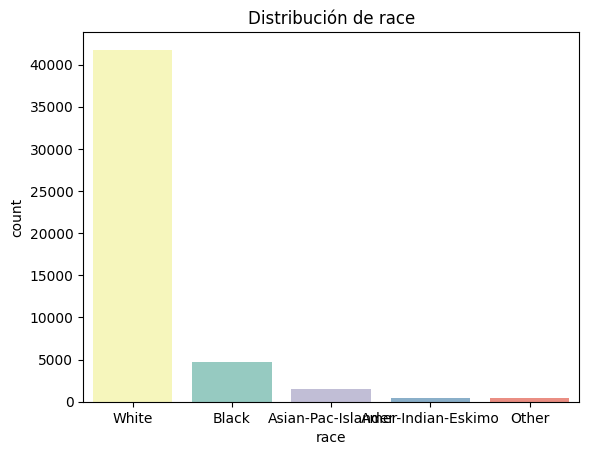

In [25]:
# --- Distribución race ---
sns.countplot(data=df, x='race', order=df['race'].value_counts().index, palette='Set3',hue='race', legend=False)
plt.title('Distribución de race')
plt.show()


## 12. Género (`gender`)

`gender` indica el género del individuo.  
En el dataset, los hombres duplican aproximadamente a las mujeres.


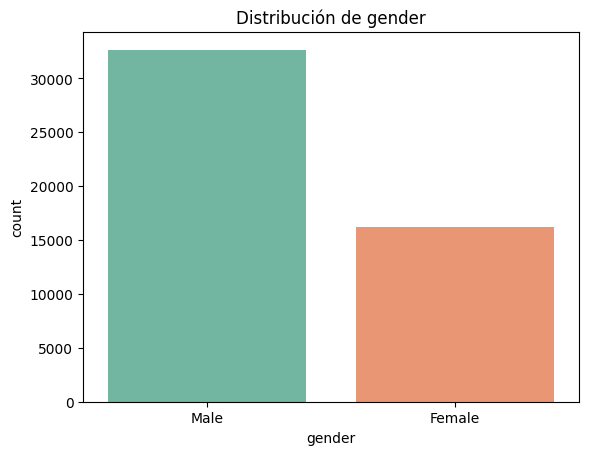

In [26]:
# --- Distribución gender ---
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index, palette='Set2',hue='gender', legend=False)
plt.title('Distribución de gender')
plt.show()


## 13. Ganancias y pérdidas de capital (`capital-gain` y `capital-loss`)

Ambas variables están muy sesgadas:

- La mayoría de los registros tiene valor 0
- Solo unos pocos individuos presentan valores significativos


## 14. Horas trabajadas por semana (`hours-per-week`)

La mayoría trabaja entre 35 y 45 horas semanales.  
Existen algunos valores extremos con jornadas más largas o muy cortas.


## 15. País de origen (`native-country`)

Predomina **United-States**, seguido por países como **Mexico**, **Philippines** y **Germany**.  
Se analizarán los 10 países más frecuentes para simplificar la visualización.


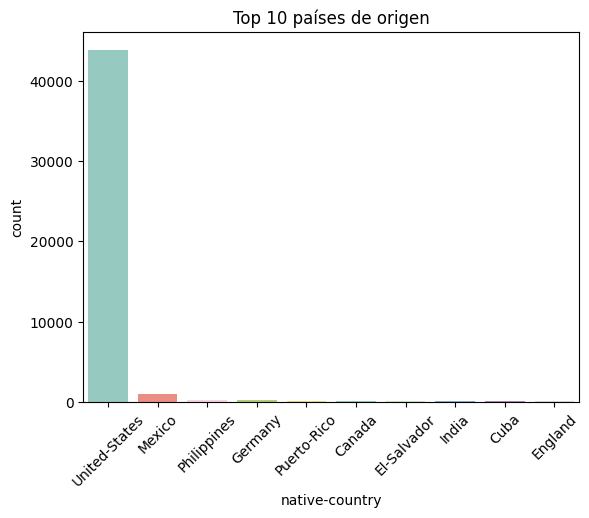

In [27]:
# --- Distribución top 10 native-country ---
top_countries = df['native-country'].value_counts().nlargest(10).index
sns.countplot(data=df, x='native-country', order=top_countries, palette='Set3', hue='native-country', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 países de origen')
plt.show()


## 16. Variable objetivo (`income`)

`income` indica si los ingresos del individuo son:

- <=50K
- >50K

La mayoría de los registros corresponde a <=50K.


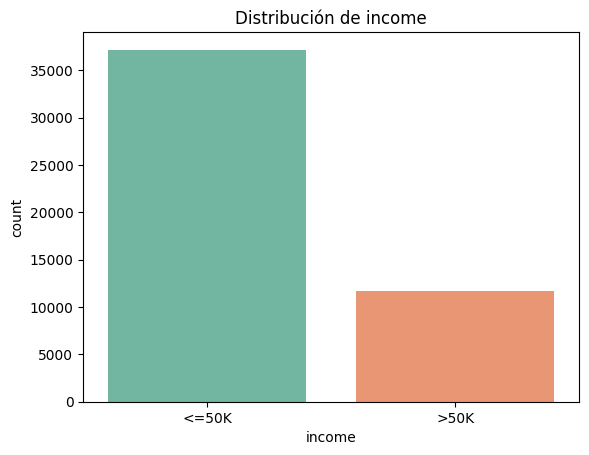

In [28]:
sns.countplot(data=df, x='income', order=df['income'].value_counts().index, palette='Set2', hue='income', legend=False)
plt.title('Distribución de income')
plt.show()
